<a href="https://colab.research.google.com/github/OptimizationExpert/Pyomo/blob/main/TANGO_of_Linkedin_CP_Puzzle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Developed by Alireza Soroudi
alireza.soroudi@gmail.com

Linkedin News letter : https://www.linkedin.com/newsletters/optimization-in-open-source-6874020019009859585/

Git hub: https://github.com/OptimizationExpert/Pyomo

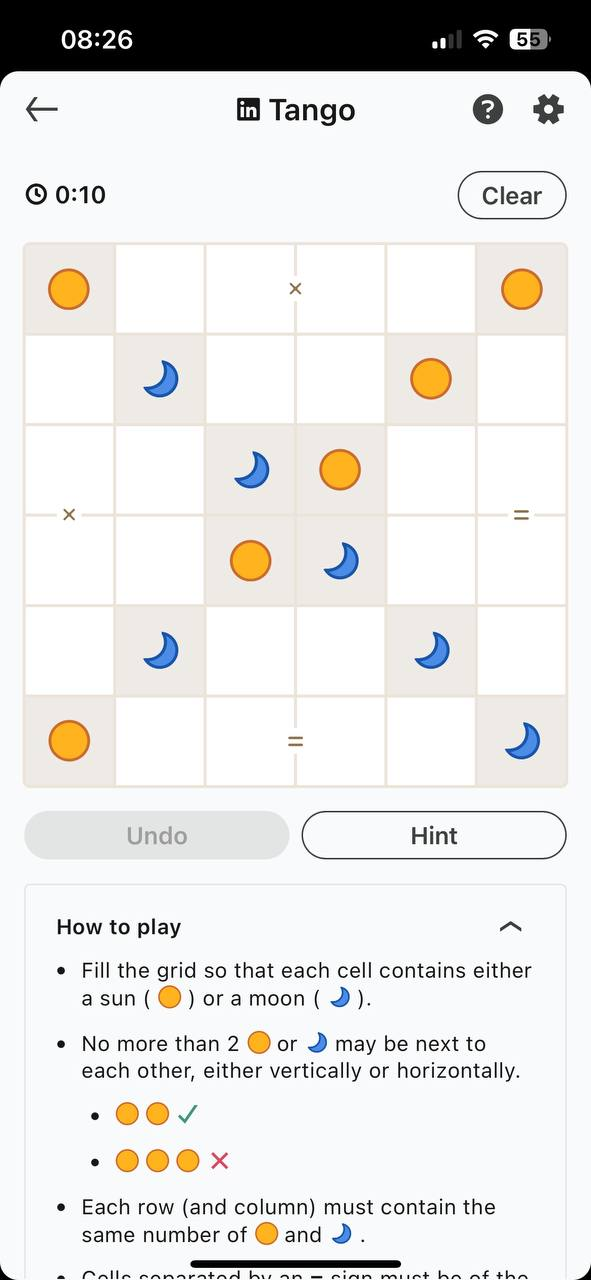

In [35]:
!pip install ortools
from ortools.sat.python import cp_model # CP-SAT solver
import numpy as np
from random import randint
import random
from math import ceil
import pandas as pd
import matplotlib.pyplot as plt # Data visualization
import time
#plt.rcParams["figure.figsize"] = (15,10)

{1: [0, 0, -1],
 2: [0, 1, -1],
 3: [0, 2, -1],
 4: [0, 3, -1],
 5: [0, 4, -1],
 6: [0, 5, -1],
 7: [1, 0, -1],
 8: [1, 1, -1],
 9: [1, 2, -1],
 10: [1, 3, -1],
 11: [1, 4, -1],
 12: [1, 5, -1],
 13: [2, 0, -1],
 14: [2, 1, -1],
 15: [2, 2, -1],
 16: [2, 3, -1],
 17: [2, 4, -1],
 18: [2, 5, -1],
 19: [3, 0, -1],
 20: [3, 1, -1],
 21: [3, 2, -1],
 22: [3, 3, -1],
 23: [3, 4, -1],
 24: [3, 5, -1],
 25: [4, 0, -1],
 26: [4, 1, -1],
 27: [4, 2, -1],
 28: [4, 3, -1],
 29: [4, 4, -1],
 30: [4, 5, -1],
 31: [5, 0, -1],
 32: [5, 1, -1],
 33: [5, 2, -1],
 34: [5, 3, -1],
 35: [5, 4, -1],
 36: [5, 5, -1]}

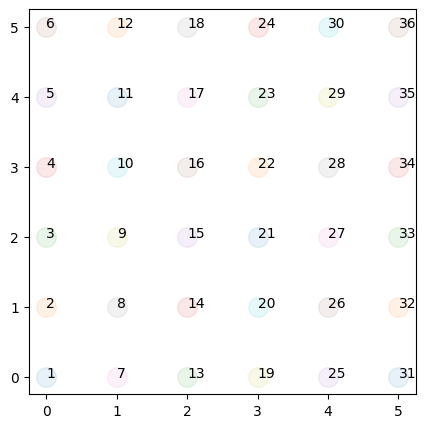

In [36]:
dic = {}
plt.figure(figsize=(5,5))
counter = 0
cell = {}
for r in range(6):
  for c in range(6):
    plt.scatter(r,c,s=200, alpha = 0.1)
    counter+=1
    plt.text(r,c,s=str(counter))
    cell[counter] = [r,c,-1]
    dic[counter]=(r,c)
cell

In [37]:
KOLORs = ['r','k','b','navy','gold','g','grey','brown','grey','orange','olive']
same = [(33,34), (13,19)]
dif = [(18,24), (3,4)]


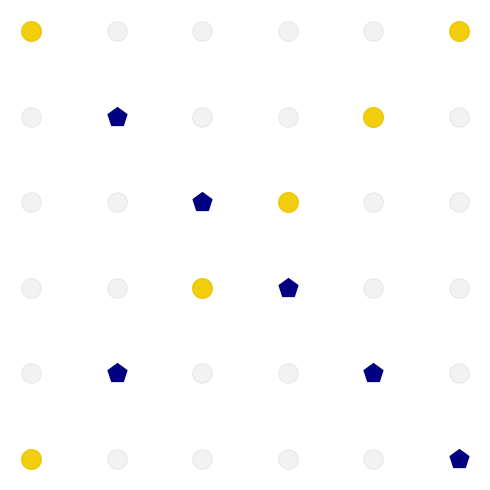

In [47]:
sun = [1,15,22,29,36,6]
star = [8,31,26,16,21,11]
for counter in sun:
  cell[counter][2] = 1
for counter in star:
  cell[counter][2] = 0


nodes = [c for c in cell.keys()]


plt.figure(figsize=(5,5))
for n in nodes:
  if cell[n][2] == 1:
    x,y = dic[n][0], dic[n][1]
    plt.scatter(x,y,s=200, c= 'gold', marker='o')
  if cell[n][2] == 0:
    x,y = dic[n][0], dic[n][1]
    plt.scatter(x,y,s=200, c= 'navy', marker='p')
  else:
    x,y = dic[n][0], dic[n][1]
    plt.scatter(x,y,s=200, c= 'grey', alpha = 0.1)


plt.axis('off')
plt.tight_layout()
plt.show()


In [49]:
model = cp_model.CpModel()
solver = cp_model.CpSolver()
U = {c:model.NewBoolVar(f"sunorstar_{c}") for c in nodes}

for n in nodes:
  if cell[n][2] == 1:
    model.Add(U[n] == 1)
  elif cell[n][2] == 0:
    model.Add(U[n] == 0)


for r in range(6):
  model.Add(sum([U[c] for c in nodes if cell[c][0] == r]) == 3)
  model.Add(sum([U[c] for c in nodes if cell[c][1] == r]) == 3)

all_verticals = [(n,m,p) for n in nodes for m in nodes for p in nodes
                if (cell[n][0]== cell[m][0]  and cell[m][0]== cell[p][0]) and

                (cell[n][1]+1 == cell[m][1]  and cell[m][1]+1== cell[p][1])
                ]
all_horizonss = [(n,m,p) for n in nodes for m in nodes for p in nodes
                if (cell[n][1]== cell[m][1]  and cell[m][1]== cell[p][1]) and

                (cell[n][0]+1 == cell[m][0]  and cell[m][0]+1== cell[p][0])
                ]

for (n,m,p) in all_verticals:
  model.Add(U[n] + U[m] + U[p] <= 2)
  model.Add(U[n].Not() + U[m].Not() + U[p].Not() <= 2)

for (n,m,p) in all_horizonss:
  model.Add(U[n] + U[m] + U[p] <= 2)
  model.Add(U[n].Not() + U[m].Not() + U[p].Not() <= 2)

for (n,m) in same:
  model.Add(U[n] == U[m])
for (n,m) in dif:
  model.Add(U[n] != U[m])

st = time.time()
status = solver.Solve(model)
et = time.time()
print(f"time = {et-st}")
print(f"status = {solver.StatusName(status)}")


time = 0.00428462028503418
status = OPTIMAL


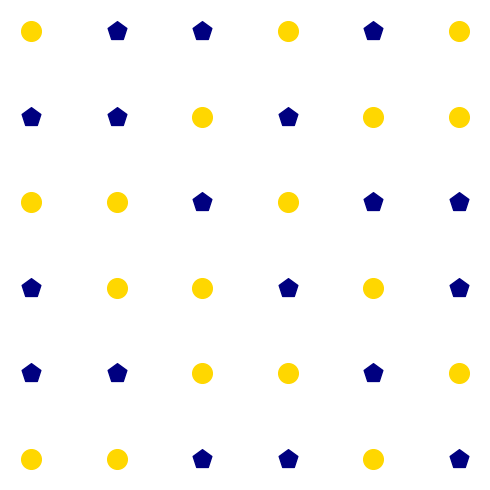

In [50]:
plt.figure(figsize=(5,5))
for n,v in U.items():
  if solver.Value(v) == 1:
    x,y = dic[n][0], dic[n][1]
    plt.scatter(x,y,s=200, c= 'gold', marker='o')
  else:
    x,y = dic[n][0], dic[n][1]
    plt.scatter(x,y,s=200, c= 'navy', marker='p')

plt.axis('off')
plt.tight_layout()
plt.show()